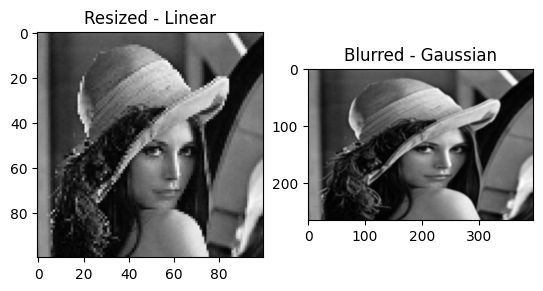

Naive Bayes Accuracy: 0.8472222222222222
Precision: 0.8649844547206135
Recall: 0.8476479221745045
F1 Score: 0.8437352605469787
Confusion Matrix:
[[31  0  0  0  0  1  0  1  0  0]
 [ 0 24  0  0  0  0  0  0  3  1]
 [ 0  2 20  0  0  0  1  0 10  0]
 [ 0  0  1 29  0  1  0  0  3  0]
 [ 0  0  0  0 38  0  1  7  0  0]
 [ 0  0  0  1  0 44  1  1  0  0]
 [ 0  0  0  0  1  0 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  2  0  0  0  0  0  2 26  0]
 [ 0  1  1  2  0  2  0  4  4 26]]
AUC: 0.9905335628227194


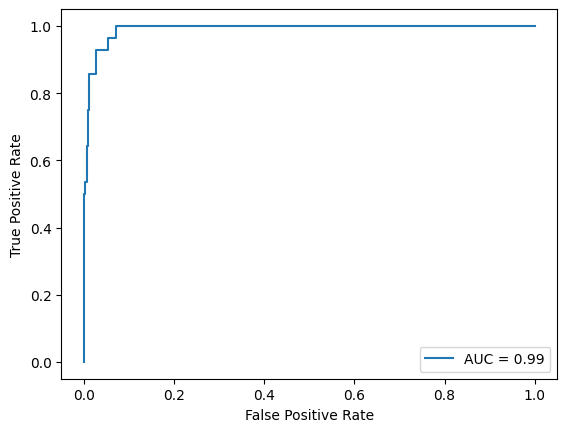

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.datasets import load_digits

# Task 1: Image Processing

def resize_image(image, method):
    interpolation_methods = {
        'linear': cv2.INTER_LINEAR,
        'nearest': cv2.INTER_NEAREST,
        'polynomial': cv2.INTER_CUBIC
    }
    return cv2.resize(image, (100, 100), interpolation=interpolation_methods[method])

def blur_image(image, method):
    if method == 'box':
        return cv2.blur(image, (5, 5))
    elif method == 'gaussian':
        return cv2.GaussianBlur(image, (5, 5), 0)
    elif method == 'adaptive':
        return cv2.medianBlur(image, 5)

# Load a sample image
image = cv2.imread('sample.jpg', cv2.IMREAD_GRAYSCALE)
resized_linear = resize_image(image, 'linear')
blurred_gaussian = blur_image(image, 'gaussian')

plt.subplot(1, 2, 1)
plt.title("Resized - Linear")
plt.imshow(resized_linear, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Blurred - Gaussian")
plt.imshow(blurred_gaussian, cmap='gray')
plt.show()

# Task 2: Machine Learning on MNIST

digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Naive Bayes
gnb = GaussianNB()
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(gnb, X_train, y_train, cv=kf)

gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)

# ROC and AUC (for one class vs. rest approach)
y_score = gnb.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

# Print Results
print(f"Naive Bayes Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{cm}")
print(f"AUC: {roc_auc}")

# ROC Curve
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()
